In [3]:
include("package.jl")
include("kagome_setup.jl")
include("KH_hamiltonian.jl")
include("ED_Thermal.jl")

entropy (generic function with 1 method)

In [4]:
include("Full_Orthogonalization_Lanczos.jl")

itFOLM_new (generic function with 3 methods)

In [27]:
"""Test GS energy of K-H model"""
step = 20; ne = 10
M = 90;
Theta = [x for x in LinRange(-1,1,step)]
la = Lattice(2,2)
dim = dimension(la)
Gs_ed = zeros(step, ne)
Gs_lm = zeros(step, ne)
#E_ed = zeros(step, dim)
#E_lm = zeros(step, dim)
for i = 1:step
    θ= Theta[i]
    J = cospi(θ) * ones(3)
    K = sinpi(θ) * ones(3)
    Hk = Kitaev(K, la)
    Hh = Heisenberg(J, la)
    Htot = Hk + Hh
    e,x = eigs(Htot, nev = ne, which = :SR)
    Gs_ed[i, :] = e
    #E_ed[i, :] = eigvals(Array(Htot))  
    T = itFOLM_new(Htot, M, false)
    elm = sort(eigvals(T))
    Gs_lm[i,:] = elm[1:ne]
    #E_lm[i,:] = eigvals(T)
end
println("Finish!")

Finish!


In [28]:
G = Gs_lm - Gs_ed
println(Gs_ed[1,:])
println(Gs_lm[1,:])

[-6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -6.0, -5.0, -5.0, -5.0]
[-6.0, -6.0, -5.99826, -5.0, -5.0, -4.22474, -4.15831, -4.0, -3.63513, -3.61803]


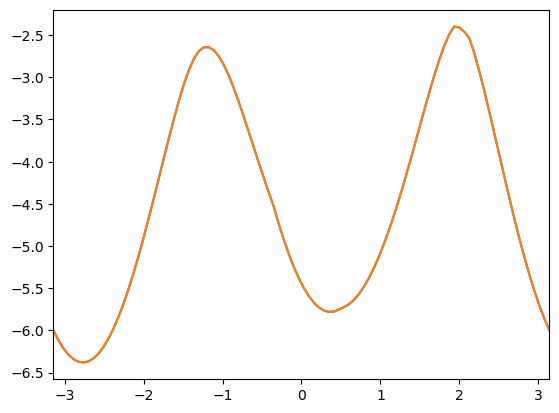

(-3.141592653589793, 3.141592653589793)

In [20]:
plot(Theta*pi, Gs_ed)
plot(Theta*pi, Gs_lm)
xlim(-pi,pi)

In [29]:
"""Test code"""
θ = 0.2
J = cospi(θ) * ones(3)
K = sinpi(θ) * ones(3)

la = Lattice(2,2)
N = sitenum(la)
dim = dimension(la)

Hk = Kitaev(K, la)
Hh = Heisenberg(J, la)
Htot = Hk + Hh;

In [30]:
e,x = eigs(Htot,  nev=10, which = :SR);
println(e)

[-5.66917, -5.61232, -5.5852, -5.5852, -5.5268, -5.5268, -5.5268, -5.46282, -5.46282, -5.46282]


In [31]:
e,x = eigs(Htot,  nev=10, which = :LR);
println(e)

[6.20298, 6.19588, 6.19588, 6.19588, 6.1885, 6.1885, 6.1885, 6.16417, 6.16161, 6.16161]
